In [1]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import os

# مسیر شیپ‌فایل منطقه آتش‌سوزی
fire_shapefile = r'E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW03_sarhadidaraz_spring2025\Wildfire Areas\Javanrood_04.shp'

# مسیر باندها
raster_files = {
    'B04': r'E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW03_sarhadidaraz_spring2025\fire\before\R10m\T38SPD_20220816T073619_B04_10m.jp2',
    'B08': r'E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW03_sarhadidaraz_spring2025\fire\before\R10m\T38SPD_20220816T073619_B08_10m.jp2',
    'B12': r'E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW03_sarhadidaraz_spring2025\20to10resolution.tif'
}

# پوشه ذخیره خروجی
output_folder = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# خواندن شیپ‌فایل و ساخت بافر ۱۰۰۰ متری
gdf = gpd.read_file(fire_shapefile)
gdf = gdf.to_crs(epsg=32638)  # اگر لازم بود
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf_buffer.geometry.buffer(700)
buffer_geoms = gdf_buffer.geometry.values

# کلیپ هر باند و ذخیره خروجی
for band, raster_path in raster_files.items():
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, buffer_geoms, crop=True)
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })
        output_path = os.path.join(output_folder, f"{band}_clip_buffer700.tif")
        with rasterio.open(output_path, "w", **out_meta) as dest:
            dest.write(out_image)
        print(f"{band} clipped and saved to: {output_path}")


B04 clipped and saved to: E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned\B04_clip_buffer700.tif
B08 clipped and saved to: E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned\B08_clip_buffer700.tif
B12 clipped and saved to: E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned\B12_clip_buffer700.tif


In [2]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import os

# مسیر شیپ‌فایل منطقه آتش‌سوزی (همان قبلی)
fire_shapefile = r'E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW03_sarhadidaraz_spring2025\Wildfire Areas\Javanrood_04.shp'

# مسیر باندها برای بعد از آتش‌سوزی (after)
raster_files = {
    'B04': r'E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW03_sarhadidaraz_spring2025\fire\after\R10m\T38SPD_20220831T073621_B04_10m.jp2',
    'B08': r'E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW03_sarhadidaraz_spring2025\fire\after\R10m\T38SPD_20220831T073621_B08_10m.jp2',
    'B12': r'E:\master_1\Msc_4032\spatial_processing\TA\AGIS_HW03_sarhadidaraz_spring2025\20to10resolution-after-burned.tif'
}

# پوشه ذخیره خروجی
output_folder = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# خواندن شیپ‌فایل و ساخت بافر ۱۰۰۰ متری
gdf = gpd.read_file(fire_shapefile)
gdf = gdf.to_crs(epsg=32638)  # اگر لازم بود
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf_buffer.geometry.buffer(700)
buffer_geoms = gdf_buffer.geometry.values

# کلیپ هر باند و ذخیره خروجی
for band, raster_path in raster_files.items():
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, buffer_geoms, crop=True)
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })
        output_path = os.path.join(output_folder, f"{band}_clip_buffer700.tif")
        with rasterio.open(output_path, "w", **out_meta) as dest:
            dest.write(out_image)
        print(f"{band} clipped and saved to: {output_path}")


B04 clipped and saved to: E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned\B04_clip_buffer700.tif
B08 clipped and saved to: E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned\B08_clip_buffer700.tif
B12 clipped and saved to: E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned\B12_clip_buffer700.tif


C:\Users\0&1\AppData\Local\Temp\ipykernel_18480\2776866071.py:32: RuntimeWarning: invalid value encountered in divide
  ndvi_before = (b08_before - b04_before) / (b08_before + b04_before)
C:\Users\0&1\AppData\Local\Temp\ipykernel_18480\2776866071.py:35: RuntimeWarning: invalid value encountered in divide
  nbr_before = (b08_before - b12_before) / (b08_before + b12_before)
C:\Users\0&1\AppData\Local\Temp\ipykernel_18480\2776866071.py:38: RuntimeWarning: invalid value encountered in divide
  ndvi_after = (b08_after - b04_after) / (b08_after + b04_after)
C:\Users\0&1\AppData\Local\Temp\ipykernel_18480\2776866071.py:41: RuntimeWarning: invalid value encountered in divide
  nbr_after = (b08_after - b12_after) / (b08_after + b12_after)


NDVI و NBR قبل و بعد ساخته شدند.


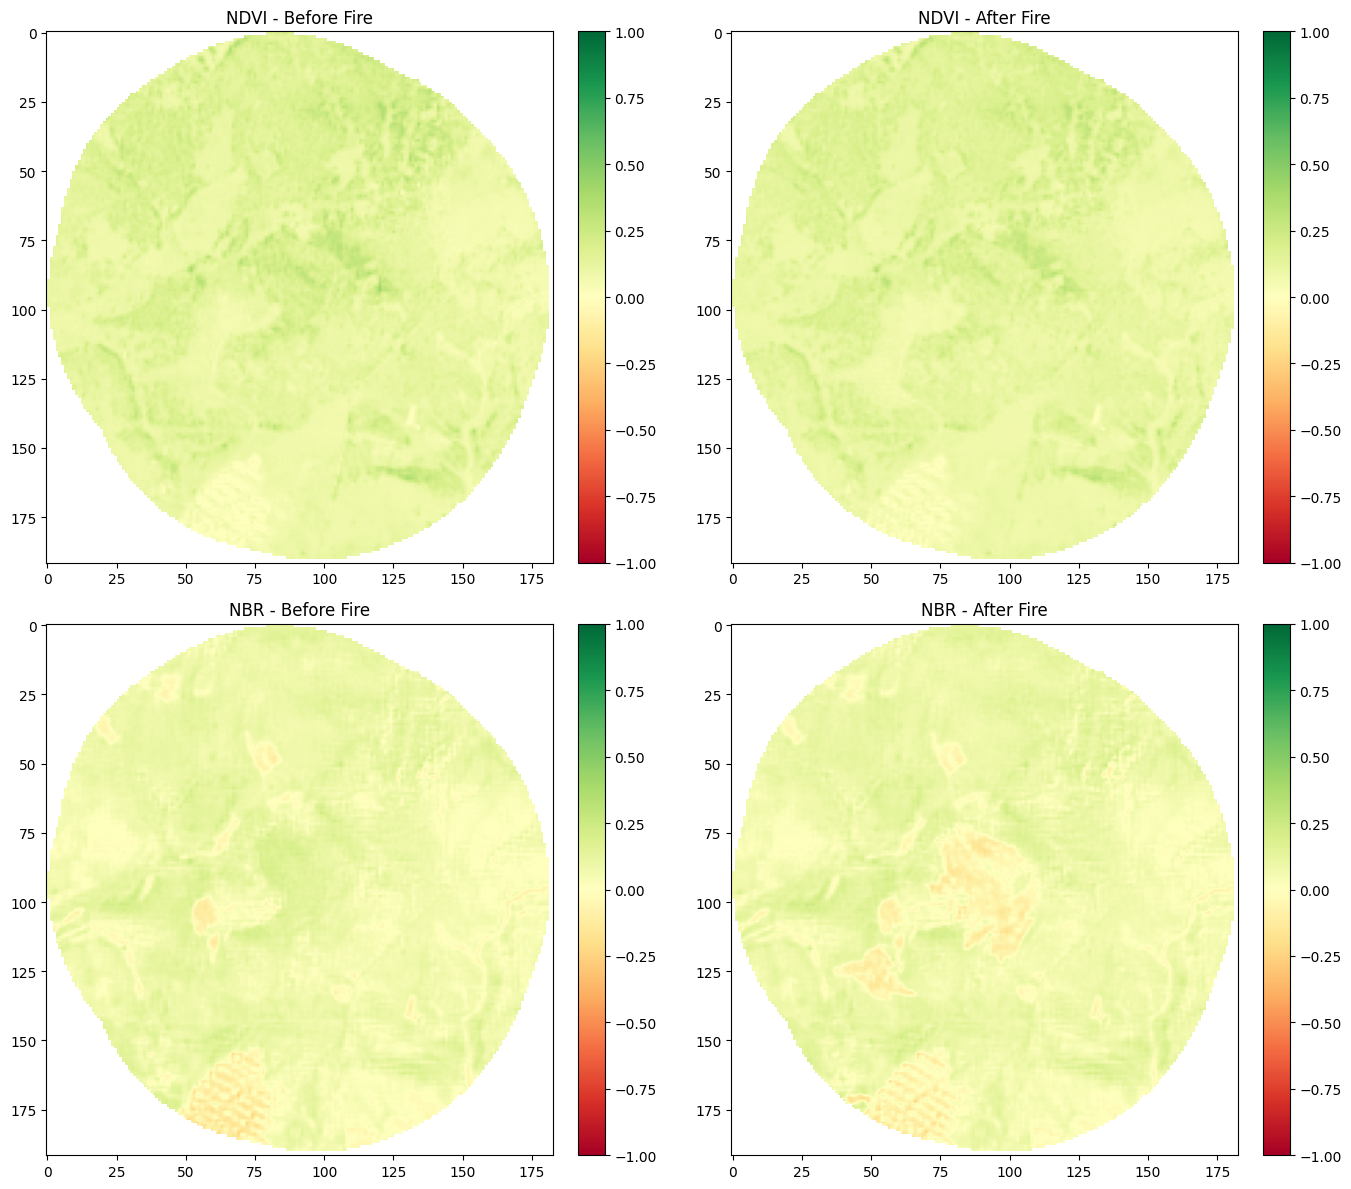

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# ---- مسیر فایل‌های کلیپ‌شده ----
B04_before = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned\B04_clip_buffer700.tif'
B08_before = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned\B08_clip_buffer700.tif'
B12_before = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned\B12_clip_buffer700.tif'

B04_after = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned\B04_clip_buffer700.tif'
B08_after = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned\B08_clip_buffer700.tif'
B12_after = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned\B12_clip_buffer700.tif'

# ---- خواندن رسترهای قبل ----
with rasterio.open(B04_before) as src:
    b04_before = src.read(1).astype('float32')
    profile = src.profile
with rasterio.open(B08_before) as src:
    b08_before = src.read(1).astype('float32')
with rasterio.open(B12_before) as src:
    b12_before = src.read(1).astype('float32')

# ---- خواندن رسترهای بعد ----
with rasterio.open(B04_after) as src:
    b04_after = src.read(1).astype('float32')
with rasterio.open(B08_after) as src:
    b08_after = src.read(1).astype('float32')
with rasterio.open(B12_after) as src:
    b12_after = src.read(1).astype('float32')

# ---- محاسبه شاخص‌ها ----
ndvi_before = (b08_before - b04_before) / (b08_before + b04_before)
ndvi_before = np.where((b08_before + b04_before) == 0, np.nan, ndvi_before)

nbr_before = (b08_before - b12_before) / (b08_before + b12_before)
nbr_before = np.where((b08_before + b12_before) == 0, np.nan, nbr_before)

ndvi_after = (b08_after - b04_after) / (b08_after + b04_after)
ndvi_after = np.where((b08_after + b04_after) == 0, np.nan, ndvi_after)

nbr_after = (b08_after - b12_after) / (b08_after + b12_after)
nbr_after = np.where((b08_after + b12_after) == 0, np.nan, nbr_after)

# ---- ذخیره NDVI و NBR قبل و بعد ----
profile.update(dtype='float32', count=1)
with rasterio.open(B04_before.replace('B04_clip_buffer700.tif', 'NDVI_before.tif'), 'w', **profile) as dst:
    dst.write(ndvi_before, 1)
with rasterio.open(B04_after.replace('B04_clip_buffer700.tif', 'NDVI_after.tif'), 'w', **profile) as dst:
    dst.write(ndvi_after, 1)
with rasterio.open(B04_before.replace('B04_clip_buffer700.tif', 'NBR_before.tif'), 'w', **profile) as dst:
    dst.write(nbr_before, 1)
with rasterio.open(B04_after.replace('B04_clip_buffer700.tif', 'NBR_after.tif'), 'w', **profile) as dst:
    dst.write(nbr_after, 1)

print('NDVI و NBR قبل و بعد ساخته شدند.')

# ---- نمایش هر چهار نقشه ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

im1 = axs[0, 0].imshow(ndvi_before, cmap='RdYlGn', vmin=-1, vmax=1)
axs[0, 0].set_title("NDVI - Before Fire")
plt.colorbar(im1, ax=axs[0, 0], fraction=0.046, pad=0.04)

im2 = axs[0, 1].imshow(ndvi_after, cmap='RdYlGn', vmin=-1, vmax=1)
axs[0, 1].set_title("NDVI - After Fire")
plt.colorbar(im2, ax=axs[0, 1], fraction=0.046, pad=0.04)

im3 = axs[1, 0].imshow(nbr_before, cmap='RdYlGn', vmin=-1, vmax=1)
axs[1, 0].set_title("NBR - Before Fire")
plt.colorbar(im3, ax=axs[1, 0], fraction=0.046, pad=0.04)

im4 = axs[1, 1].imshow(nbr_after, cmap='RdYlGn', vmin=-1, vmax=1)
axs[1, 1].set_title("NBR - After Fire")
plt.colorbar(im4, ax=axs[1, 1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


dNDVI و dNBR ساخته شدند.


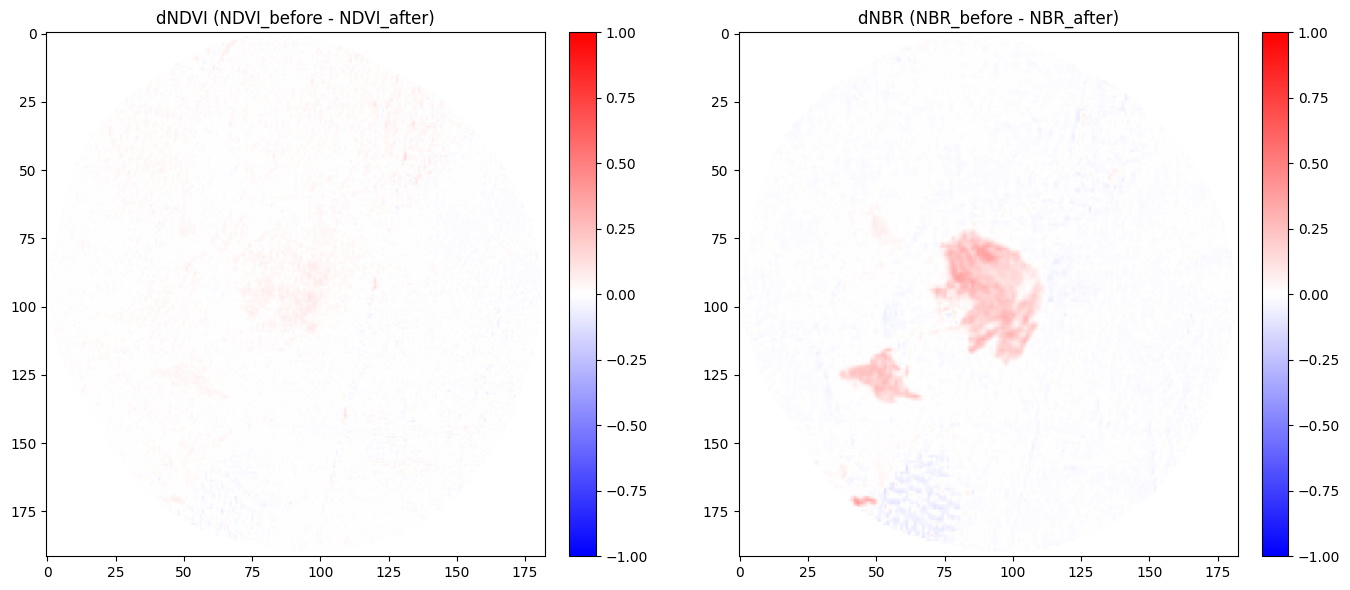

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# مسیر NDVI و NBR قبل و بعد
ndvi_before = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned\NDVI_before.tif'
ndvi_after  = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned\NDVI_after.tif'
nbr_before  = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_before_burned\NBR_before.tif'
nbr_after   = r'E:\master_1\Msc_4032\spatial_processing\TA\clipped_bands_after_burned\NBR_after.tif'

with rasterio.open(ndvi_before) as src:
    NDVI_b = src.read(1)
    profile = src.profile
with rasterio.open(ndvi_after) as src:
    NDVI_a = src.read(1)
with rasterio.open(nbr_before) as src:
    NBR_b = src.read(1)
with rasterio.open(nbr_after) as src:
    NBR_a = src.read(1)

dNDVI = NDVI_b - NDVI_a
dNBR = NBR_b - NBR_a

profile.update(dtype='float32')
with rasterio.open(ndvi_before.replace('NDVI_before.tif', 'dNDVI.tif'), 'w', **profile) as dst:
    dst.write(dNDVI.astype('float32'), 1)
with rasterio.open(nbr_before.replace('NBR_before.tif', 'dNBR.tif'), 'w', **profile) as dst:
    dst.write(dNBR.astype('float32'), 1)

print("dNDVI و dNBR ساخته شدند.")

# پلات فوری
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
im1 = axs[0].imshow(dNDVI, cmap='bwr', vmin=-1, vmax=1)
axs[0].set_title("dNDVI (NDVI_before - NDVI_after)")
plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

im2 = axs[1].imshow(dNBR, cmap='bwr', vmin=-1, vmax=1)
axs[1].set_title("dNBR (NBR_before - NBR_after)")
plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


Burn Severity map ذخیره شد.


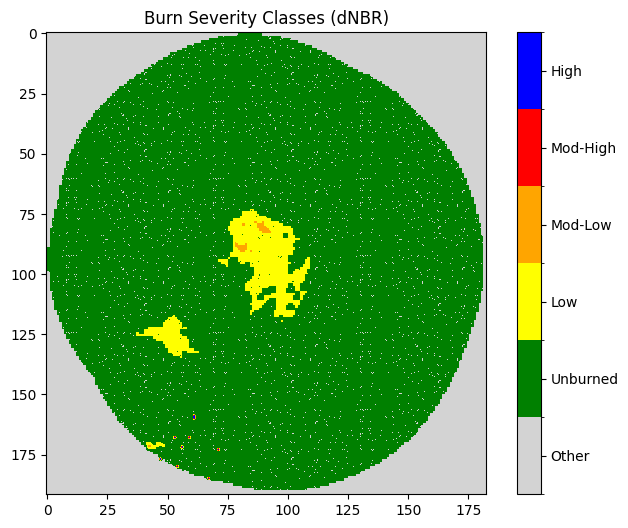

   Class      Class_Name  Pixel_Count
0      0           Other         8300
1      1        Unburned        25543
2      2             Low         1172
3      3         Mod-Low          112
4      6  Increased Veg.            9
نقشه طبقه‌بندی به صورت GeoTIFF ذخیره شد و در ArcMap یا ArcGIS قابل نمایش است:
E:\master_1\Msc_4032\spatial_processing\TA\burn_severity_class_map.tif


In [5]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# فرض می‌کنیم dNBR و profile قبلاً ساخته شدن (مثلاً با کد قبلی)
# اگر نداری، باید قبلش dNBR را بسازی

# طبقه‌بندی شدت بر اساس dNBR
burn_severity = np.full(dNBR.shape, 0, dtype=np.uint8)  # 0=other

burn_severity[dNBR > 0.66] = 5      # High
burn_severity[(dNBR > 0.44) & (dNBR <= 0.66)] = 4   # Mod-High
burn_severity[(dNBR > 0.27) & (dNBR <= 0.44)] = 3   # Mod-Low
burn_severity[(dNBR > 0.10) & (dNBR <= 0.27)] = 2   # Low
burn_severity[(dNBR > -0.10) & (dNBR <= 0.10)] = 1  # Unburned
burn_severity[dNBR <= -0.10] = 6   # Increased vegetation

# ذخیره رستر طبقه‌بندی شده
with rasterio.open(nbr_before.replace('NBR_before.tif', 'BurnSeverity_dNBR.tif'), 'w', **profile) as dst:
    dst.write(burn_severity, 1)
print("Burn Severity map ذخیره شد.")

# پلات طبقه‌بندی
colors = ['lightgrey', 'green', 'yellow', 'orange', 'red', 'blue'] # 0,1,2,3,4,5,6
cmap = mcolors.ListedColormap(colors)
bounds = [0,1,2,3,4,5,6]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(8,6))
plt.imshow(burn_severity, cmap=cmap, norm=norm)
cbar = plt.colorbar(ticks=[0.5,1.5,2.5,3.5,4.5,5.5])
cbar.ax.set_yticklabels(['Other','Unburned','Low','Mod-Low','Mod-High','High'])
plt.title("Burn Severity Classes (dNBR)")
plt.show()

# محاسبه تعداد پیکسل هر کلاس
unique, counts = np.unique(burn_severity, return_counts=True)
class_names = {
    0: 'Other',
    1: 'Unburned',
    2: 'Low',
    3: 'Mod-Low',
    4: 'Mod-High',
    5: 'High',
    6: 'Increased Veg.'
}
df = pd.DataFrame({'Class': unique, 'Class_Name': [class_names.get(i, 'Unknown') for i in unique], 'Pixel_Count': counts})
print(df)

import rasterio
import numpy as np

output_path = r'E:\master_1\Msc_4032\spatial_processing\TA\burn_severity_class_map.tif'

# آپدیت profile برای ذخیره رستر طبقه‌بندی
profile.update(
    dtype='uint8',  # اگر تعداد کلاس کمتر از 256 هست (معمولاً همینطوره)
    count=1,        # فقط یک باند
    compress='lzw'  # فشرده‌سازی توصیه‌شده
)

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(burn_severity.astype('uint8'), 1)

print('نقشه طبقه‌بندی به صورت GeoTIFF ذخیره شد و در ArcMap یا ArcGIS قابل نمایش است:')
print(output_path)



In [ ]:
import rasterio
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import random
import os

# پارامترها
tif_path = r'E:\master_1\Msc_4032\spatial_processing\TA\burn_severity_class_map.tif'
train_out = tif_path.replace('.tif', '_train_split.shp')
test_out = tif_path.replace('.tif', '_test_split.shp')
total_per_class = 300
train_ratio = 0.8

# خواندن رستر طبقه‌بندی
with rasterio.open(tif_path) as src:
    raster = src.read(1)
    transform = src.transform
    crs = src.crs
    height, width = raster.shape
    mid_row = height // 2

    # موقعیت پیکسل‌ها
    burned_rows, burned_cols = np.where(raster == 2)
    unburned_rows, unburned_cols = np.where(raster == 0)

    def sample_points(rows, cols, n, from_top=True):
        selected = []
        coords = list(zip(rows, cols))
        random.shuffle(coords)
        count = 0
        for r, c in coords:
            if from_top and r < mid_row:
                selected.append((r, c))
                count += 1
            elif not from_top and r >= mid_row:
                selected.append((r, c))
                count += 1
            if count >= n:
                break
        return selected

    # نمونه‌برداری
    burned_train_idx = sample_points(burned_rows, burned_cols, int(train_ratio * total_per_class), from_top=True)
    burned_test_idx = sample_points(burned_rows, burned_cols, total_per_class - len(burned_train_idx), from_top=False)

    unburned_train_idx = sample_points(unburned_rows, unburned_cols, int(train_ratio * total_per_class), from_top=True)
    unburned_test_idx = sample_points(unburned_rows, unburned_cols, total_per_class - len(unburned_train_idx), from_top=False)

    # ساخت GeoDataFrame
    def build_gdf(indices, label):
        points = []
        labels = []
        for r, c in indices:
            x, y = rasterio.transform.xy(transform, r, c)
            points.append(Point(x, y))
            labels.append(label)
        return gpd.GeoDataFrame({'label': labels, 'geometry': points}, crs=crs)

    gdf_train = pd.concat([
        build_gdf(burned_train_idx, 2),
        build_gdf(unburned_train_idx, 0)
    ])

    gdf_test = pd.concat([
        build_gdf(burned_test_idx, 2),
        build_gdf(unburned_test_idx, 0)
    ])

# ذخیره نهایی
gdf_train.to_file(train_out)
gdf_test.to_file(test_out)
print(f'✅ Train: {len(gdf_train)} points saved to {train_out}')
print(f'✅ Test: {len(gdf_test)} points saved to {test_out}')


In [ ]:
import rasterio
import pandas as pd
import geopandas as gpd
import numpy as np
import os

# مسیر نقاط آموزشی و آزمون
base_path = r'E:\master_1\Msc_4032\spatial_processing\TA'
train_path = os.path.join(base_path, 'burn_severity_class_map_train_split.shp')
test_path = os.path.join(base_path, 'burn_severity_class_map_test_split.shp')

# بارگذاری نقاط
train_gdf = gpd.read_file(train_path)
test_gdf = gpd.read_file(test_path)

# مسیر رسترهای ویژگی
rasters = {
    'B04_before': os.path.join(base_path, 'clipped_bands_before_burned', 'B04_clip_buffer700.tif'),
    'B08_before': os.path.join(base_path, 'clipped_bands_before_burned', 'B08_clip_buffer700.tif'),
    'B12_before': os.path.join(base_path, 'clipped_bands_before_burned', 'B12_clip_buffer700.tif'),
    'NDVI_before': os.path.join(base_path, 'clipped_bands_before_burned', 'NDVI_before.tif'),
    'NBR_before': os.path.join(base_path, 'clipped_bands_before_burned', 'NBR_before.tif'),
    'B04_after': os.path.join(base_path, 'clipped_bands_after_burned', 'B04_clip_buffer700.tif'),
    'B08_after': os.path.join(base_path, 'clipped_bands_after_burned', 'B08_clip_buffer700.tif'),
    'B12_after': os.path.join(base_path, 'clipped_bands_after_burned', 'B12_clip_buffer700.tif'),
    'NDVI_after': os.path.join(base_path, 'clipped_bands_after_burned', 'NDVI_after.tif'),
    'NBR_after': os.path.join(base_path, 'clipped_bands_after_burned', 'NBR_after.tif'),
    'dNDVI': os.path.join(base_path, 'clipped_bands_before_burned', 'dNDVI.tif'),
    'dNBR': os.path.join(base_path, 'clipped_bands_before_burned', 'dNBR.tif'),
}

def extract_features(gdf, rasters_dict):
    for feat, raster_path in rasters_dict.items():
        values = []
        with rasterio.open(raster_path) as src:
            for pt in gdf.geometry:
                try:
                    row, col = src.index(pt.x, pt.y)
                    val = src.read(1)[row, col]
                except:
                    val = np.nan
                values.append(val)
        gdf[feat] = values
    return gdf.dropna()

# استخراج ویژگی‌ها
train_gdf = extract_features(train_gdf, rasters)
test_gdf = extract_features(test_gdf, rasters)

# ذخیره به CSV
train_gdf.drop(columns='geometry').to_csv(os.path.join(base_path, 'train_features_split.csv'), index=False)
test_gdf.drop(columns='geometry').to_csv(os.path.join(base_path, 'test_features_split.csv'), index=False)

print("✅ ویژگی‌های طیفی برای نقاط آموزش و آزمون استخراج و ذخیره شدند.")


✅ Accuracy on test set: 0.935

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           2       0.90      1.00      0.95        19

    accuracy                           0.94        31
   macro avg       0.95      0.92      0.93        31
weighted avg       0.94      0.94      0.93        31



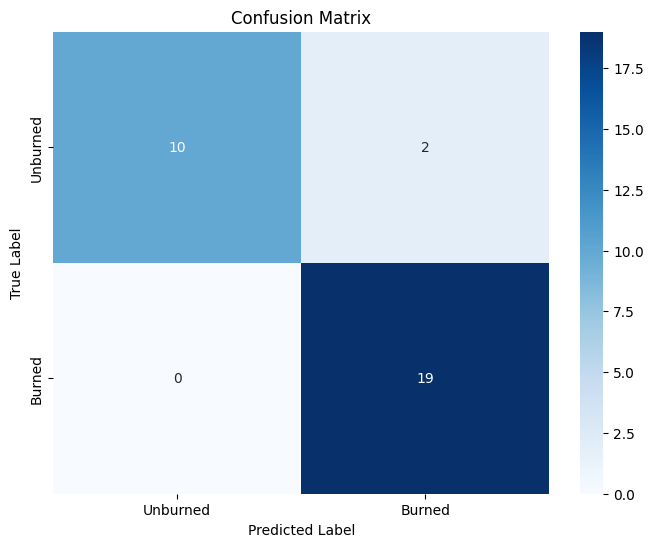

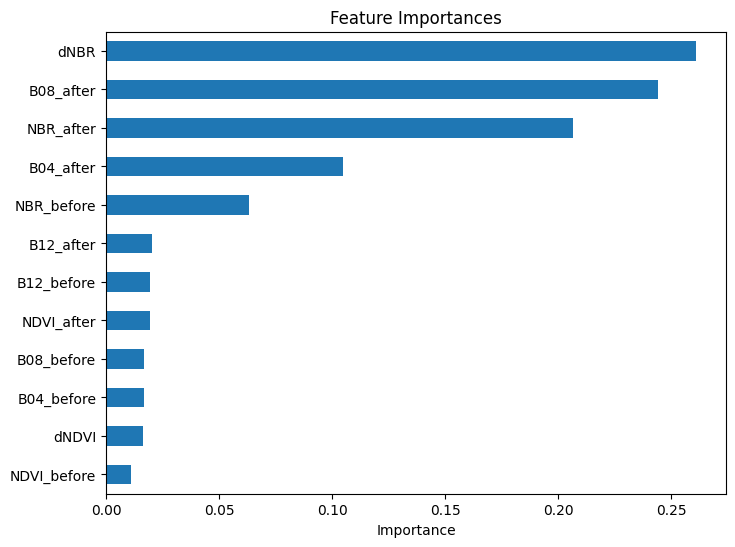

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# مسیر فایل‌های ویژگی
base_path = r'E:\master_1\Msc_4032\spatial_processing\TA'
train_csv = os.path.join(base_path, 'train_features_split.csv')
test_csv = os.path.join(base_path, 'test_features_split.csv')

# خواندن داده‌ها
train_df = pd.read_csv(train_csv).dropna()
test_df = pd.read_csv(test_csv).dropna()

# ویژگی‌ها و برچسب‌ها
feature_cols = [
    'B04_before', 'B08_before', 'B12_before', 'NDVI_before', 'NBR_before',
    'B04_after', 'B08_after', 'B12_after', 'NDVI_after', 'NBR_after',
    'dNDVI', 'dNBR'
]

X_train = train_df[feature_cols]
y_train = train_df['label']
X_test = test_df[feature_cols]
y_test = test_df['label']

# مدل Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=43)
rf.fit(X_train, y_train)

# پیش‌بینی
y_pred = rf.predict(X_test)

# ارزیابی
print(f'✅ Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}\n')
print(classification_report(y_test, y_pred))

# ماتریس درهم‌ریختگی
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unburned', 'Burned'],
            yticklabels=['Unburned', 'Burned'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# اهمیت ویژگی‌ها
feat_imp = pd.Series(rf.feature_importances_, index=feature_cols)
feat_imp.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()


📊 مدل باینری یا رگرسیونی


<Figure size 1000x600 with 0 Axes>

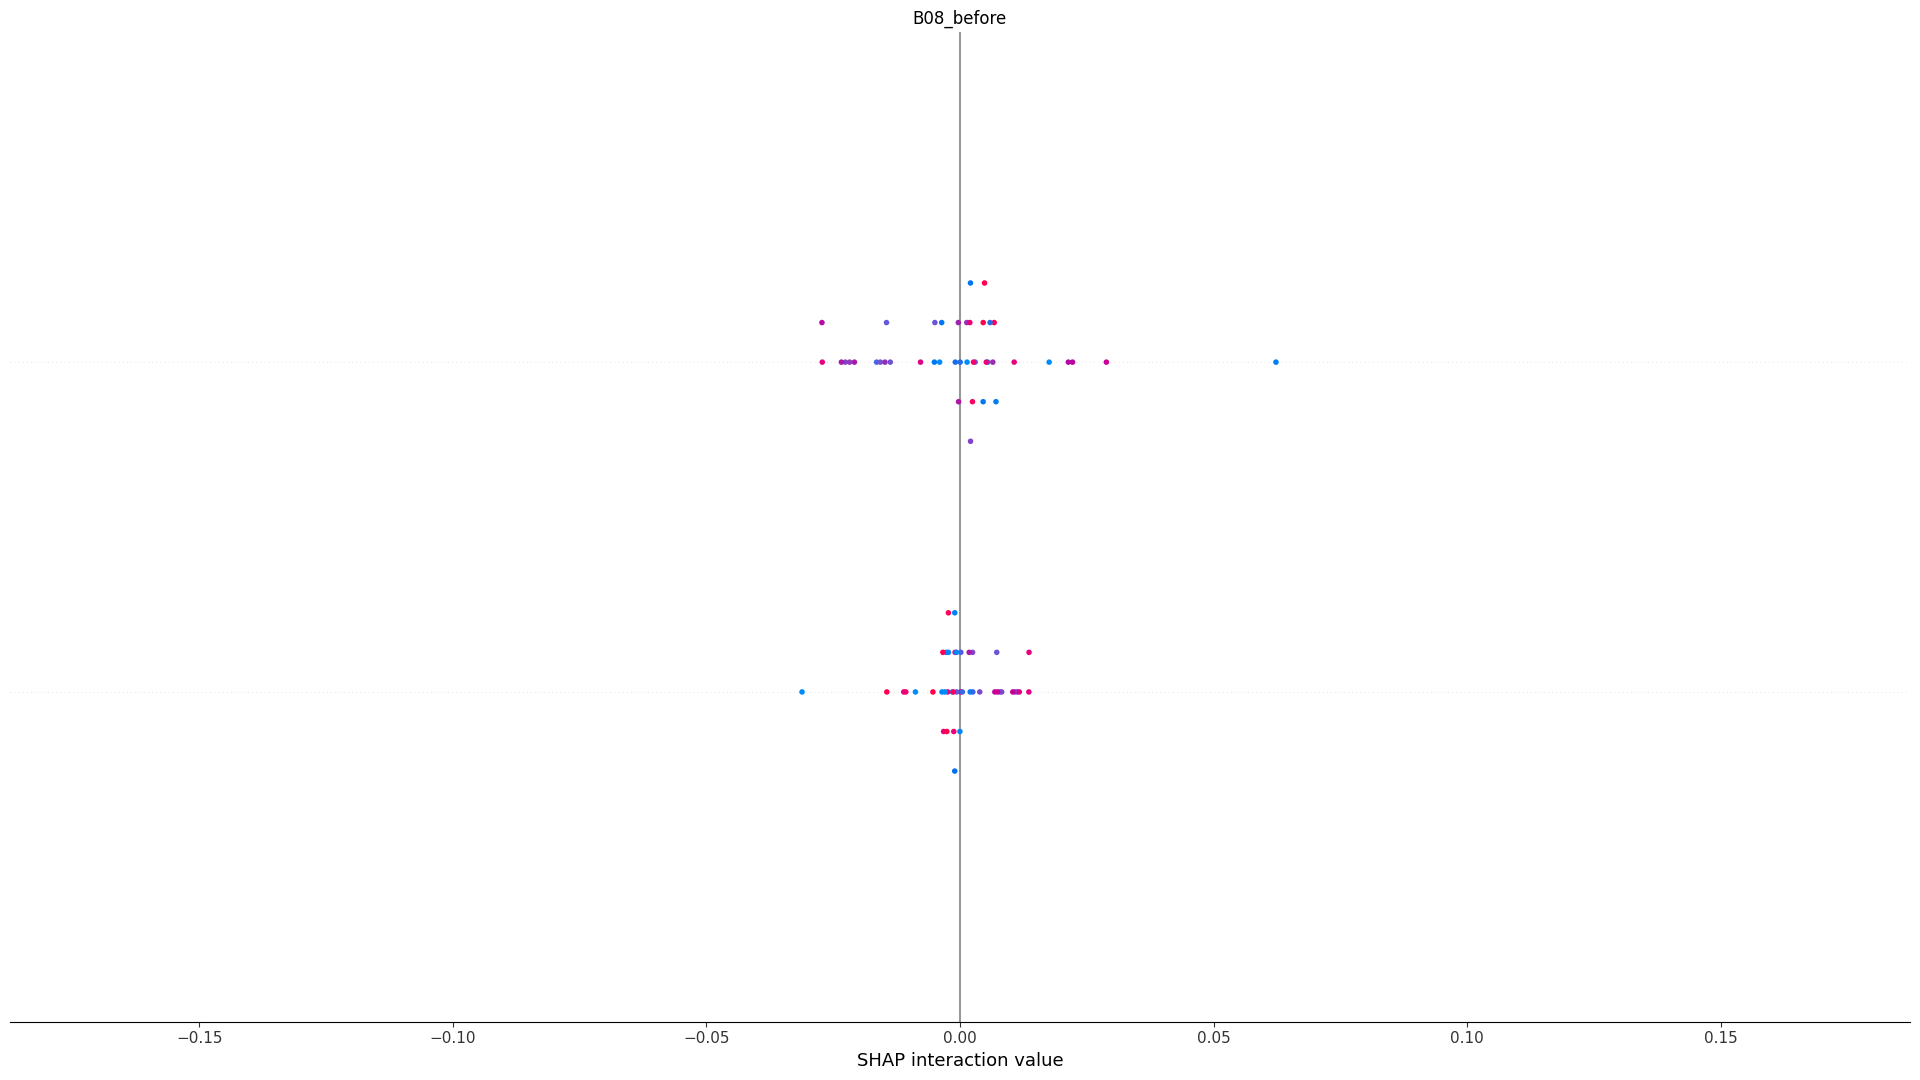

In [7]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# فرض: مدل rf و دیتافریم X_train آماده‌اند

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# بررسی کلاس‌ها
if isinstance(shap_values, list) and len(shap_values) > 1:
    n_classes = len(shap_values)
    
    for i in range(n_classes):
        print(f"\n📊 نمودار SHAP برای کلاس {i}")
        
        sv = np.array(shap_values[i])
        if sv.shape[1] > X_train.shape[1]:
            sv = sv[:, :X_train.shape[1]]
        
        plt.figure(figsize=(10, 6))  # سایز شکل بزرگ‌تر
        shap.summary_plot(sv, X_train, feature_names=X_train.columns, plot_type="dot", max_display=15)
        
# حالت باینری یا رگرسیونی
elif isinstance(shap_values, np.ndarray):
    print("📊 مدل باینری یا رگرسیونی")

    sv = shap_values
    if sv.shape[1] > X_train.shape[1]:
        sv = sv[:, :X_train.shape[1]]

    plt.figure(figsize=(10, 6))
    shap.summary_plot(sv, X_train, feature_names=X_train.columns, plot_type="dot", max_display=15)

else:
    print("⚠️ ساختار shap_values ناشناخته است.")


✅ نقشه پیش‌بینی فقط برای نواحی سوخته ذخیره شد:
E:\master_1\Msc_4032\spatial_processing\TA\ml_prediction_burned_area.tif


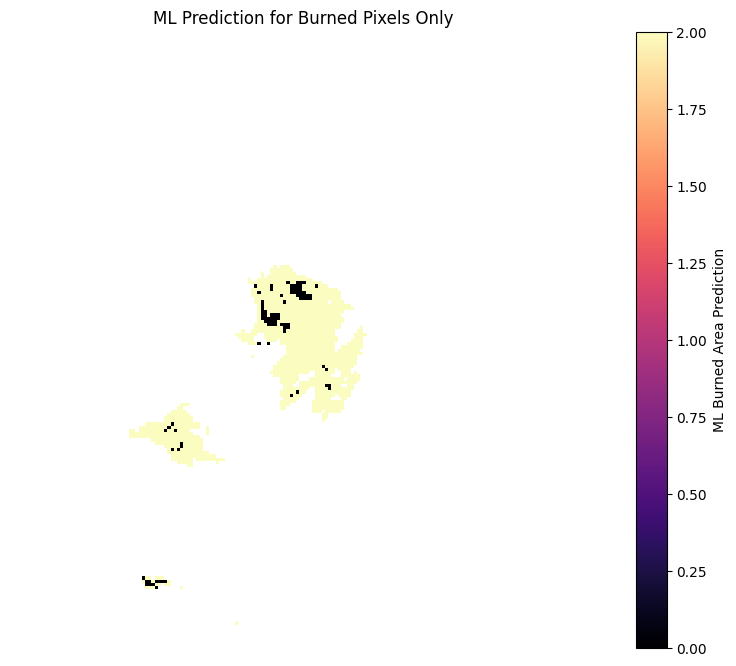

In [9]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import pyproj

os.environ['PROJ_LIB'] = pyproj.datadir.get_data_dir()


# رسترهای ورودی
# rasters = {'NDVI': 'path_to_ndvi.tif', 'LST': 'path_to_lst.tif', ...}

burn_severity_raster = r'E:\master_1\Msc_4032\spatial_processing\TA\burn_severity_class_map.tif'
output_raster_path = r'E:\master_1\Msc_4032\spatial_processing\TA\ml_prediction_burned_area.tif'
base_path = r'E:\master_1\Msc_4032\spatial_processing\TA'


rasters = {
    'B04_before': os.path.join(base_path, 'clipped_bands_before_burned', 'B04_clip_buffer700.tif'),
    'B08_before': os.path.join(base_path, 'clipped_bands_before_burned', 'B08_clip_buffer700.tif'),
    'B12_before': os.path.join(base_path, 'clipped_bands_before_burned', 'B12_clip_buffer700.tif'),
    'NDVI_before': os.path.join(base_path, 'clipped_bands_before_burned', 'NDVI_before.tif'),
    'NBR_before': os.path.join(base_path, 'clipped_bands_before_burned', 'NBR_before.tif'),
    'B04_after': os.path.join(base_path, 'clipped_bands_after_burned', 'B04_clip_buffer700.tif'),
    'B08_after': os.path.join(base_path, 'clipped_bands_after_burned', 'B08_clip_buffer700.tif'),
    'B12_after': os.path.join(base_path, 'clipped_bands_after_burned', 'B12_clip_buffer700.tif'),
    'NDVI_after': os.path.join(base_path, 'clipped_bands_after_burned', 'NDVI_after.tif'),
    'NBR_after': os.path.join(base_path, 'clipped_bands_after_burned', 'NBR_after.tif'),
    'dNDVI': os.path.join(base_path, 'clipped_bands_before_burned', 'dNDVI.tif'),
    'dNBR': os.path.join(base_path, 'clipped_bands_before_burned', 'dNBR.tif'),
    }


# سیستم مختصات مورد نظر (مثل شیپ‌فایل)
target_crs = 'EPSG:32638'

# خواندن نقشه شدت سوختگی
with rasterio.open(burn_severity_raster) as src:
    burn_severity = src.read(1)
    meta = src.meta.copy()
    height, width = src.height, src.width

# مقدار nodata اگر None باشد، مقدار پیش‌فرض 0
nodata_value = meta['nodata'] if meta['nodata'] is not None else 0

# تعریف کلاس‌های سوخته
burned_classes = [2, 3, 4, 5]
mask = np.isin(burn_severity, burned_classes)

# آرایه خروجی با مقدار صفر یا nodata
prediction_array = np.full((height, width), nodata_value, dtype=np.uint8)

# بارگذاری همه رسترهای ورودی به حافظه
raster_data = {}
for band, path in rasters.items():
    with rasterio.open(path) as src:
        raster_data[band] = src.read(1)

# پیدا کردن پیکسل‌های سوخته برای پیش‌بینی
rows, cols = np.where(mask)

for row, col in zip(rows, cols):
    features = []
    missing_data = False
    for band in rasters.keys():
        value = raster_data[band][row, col]
        if np.isnan(value) or value == nodata_value:
            missing_data = True
            break
        features.append(value)
    
    if not missing_data:
        feature_df = pd.DataFrame([features], columns=rasters.keys())
        prediction = rf.predict(feature_df)[0]
        prediction_array[row, col] = prediction
    else:
        prediction_array[row, col] = nodata_value

# 📌 به‌روزرسانی متادیتا با CRS صحیح
meta.update(dtype=rasterio.uint8, count=1, crs=target_crs)

# ذخیره فایل رستری خروجی
with rasterio.open(output_raster_path, 'w', **meta) as dst:
    dst.write(prediction_array, 1)

print(f"✅ نقشه پیش‌بینی فقط برای نواحی سوخته ذخیره شد:\n{output_raster_path}")

# نمایش خروجی
plt.figure(figsize=(10, 8))
plt.imshow(np.where(mask, prediction_array, np.nan), cmap='magma')
plt.colorbar(label='ML Burned Area Prediction')
plt.title('ML Prediction for Burned Pixels Only')
plt.axis('off')
plt.show()


📊 مقایسه مساحت‌ها (به متر مربع):
مساحت پیش‌بینی‌شده مدل: 119400.00
مساحت واقعی (شیپ‌فایل): 120500.00
تقاطع دو ناحیه: 93100.00
✅ اضافه‌تخمین (over): 26300.00
⚠️ کم‌تخمین (under): 27400.00
درصد اضافه‌تخمین: 21.83%
درصد کم‌تخمین: 22.74%


c:\Users\0&1\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


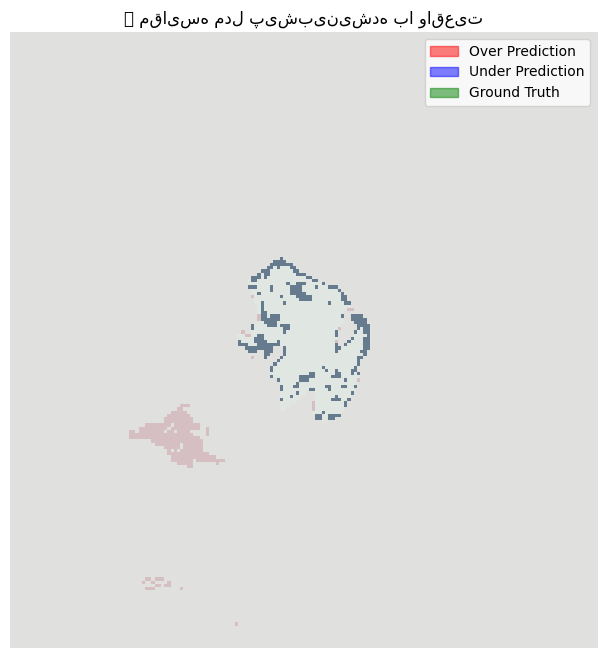

In [12]:
import geopandas as gpd
import rasterio
import rasterio.mask
from rasterio.features import geometry_mask
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import os

# مسیرها
predicted_raster_path = r'E:\master_1\Msc_4032\spatial_processing\TA\ml_prediction_burned_area.tif'
ground_truth_shp = r'E:\master_1\Msc_4032\spatial_processing\TA\Javanrood_04.shp'

# باز کردن شیپ فایل
gdf = gpd.read_file(ground_truth_shp)

# باز کردن رستر پیش‌بینی‌شده
with rasterio.open(predicted_raster_path) as src:
    predicted_array = src.read(1)
    predicted_meta = src.meta.copy()
    predicted_transform = src.transform
    predicted_crs = src.crs
    pixel_area = abs(src.res[0] * src.res[1])  # مساحت هر پیکسل

# اطمینان از یکسان بودن CRS
if gdf.crs != predicted_crs:
    gdf = gdf.to_crs(predicted_crs)

# ماسک کردن رستر با شیپ‌فایل: برای استخراج نواحی تقاطع
mask = geometry_mask(gdf.geometry, transform=predicted_transform,
                     invert=True, out_shape=predicted_array.shape)

# پیکسل‌های سوخته در مدل پیش‌بینی‌شده (مقدار غیر صفر)
pred_burned_mask = predicted_array > 0

# 🎯 مقایسه: چند پیکسل مدل با شیپ‌فایل همپوشانی دارد؟
intersection = pred_burned_mask & mask
only_predicted = pred_burned_mask & ~mask
only_truth = mask & ~pred_burned_mask

# 🔢 محاسبه مساحت‌ها
predicted_area = pred_burned_mask.sum() * pixel_area
truth_area = mask.sum() * pixel_area
intersection_area = intersection.sum() * pixel_area
over_prediction = only_predicted.sum() * pixel_area
under_prediction = only_truth.sum() * pixel_area

# چاپ نتایج عددی
print("📊 مقایسه مساحت‌ها (به متر مربع):")
print(f"مساحت پیش‌بینی‌شده مدل: {predicted_area:.2f}")
print(f"مساحت واقعی (شیپ‌فایل): {truth_area:.2f}")
print(f"تقاطع دو ناحیه: {intersection_area:.2f}")
print(f"✅ اضافه‌تخمین (over): {over_prediction:.2f}")
print(f"⚠️ کم‌تخمین (under): {under_prediction:.2f}")

# ✅ درصد خطا نسبت به واقعیت
over_percent = (over_prediction / truth_area) * 100
under_percent = (under_prediction / truth_area) * 100
print(f"درصد اضافه‌تخمین: {over_percent:.2f}%")
print(f"درصد کم‌تخمین: {under_percent:.2f}%")

# 📊 نمایش بصری اختلاف‌ها
plt.figure(figsize=(12, 8))
plt.imshow(predicted_array, cmap='gray', alpha=0.4)
plt.imshow(mask, cmap='Greens', alpha=0.3)  # سبز: واقعیت
plt.imshow(only_predicted, cmap='Reds', alpha=0.4)  # قرمز: اضافه‌تخمین
plt.imshow(only_truth, cmap='Blues', alpha=0.4)  # آبی: کم‌تخمین

plt.title("📌 مقایسه مدل پیش‌بینی‌شده با واقعیت")
plt.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, color="red", alpha=0.5, label="Over Prediction"),
    plt.Rectangle((0, 0), 1, 1, color="blue", alpha=0.5, label="Under Prediction"),
    plt.Rectangle((0, 0), 1, 1, color="green", alpha=0.5, label="Ground Truth"),
])
plt.axis('off')
plt.show()
